## Import Library

In [114]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from matplotlib import pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering, KMeans
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.metrics import silhouette_score
!pip install kneed
from kneed import KneeLocator

In [115]:
# load dataset and show the first five sample
url = "https://raw.githubusercontent.com/NathaliaMinoque/datasets/refs/heads/main/COVID-19%20Coronavirus%20(2).csv"
df = pd.read_csv(url)
df.head()

,Country,Other names,ISO 3166-1 alpha-3 CODE,Population,Continent,Total Cases,Total Deaths,Tot Cases//1M pop,Tot Deaths/1M pop,Death percentage
0,Afghanistan,Afghanistan,AFG,40462186,Asia,177827,7671,4395,190,4.313743
1,Albania,Albania,ALB,2872296,Europe,273870,3492,95349,1216,1.275058
2,Algeria,Algeria,DZA,45236699,Africa,265691,6874,5873,152,2.587216
3,Andorra,Andorra,AND,77481,Europe,40024,153,516565,1975,0.382271
4,Angola,Angola,AGO,34654212,Africa,99194,1900,2862,55,1.915438


In [116]:
# Get info from dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225 entries, 0 to 224
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Country                  225 non-null    object 
 1   Other names              224 non-null    object 
 2   ISO 3166-1 alpha-3 CODE  225 non-null    object 
 3   Population               225 non-null    int64  
 4   Continent                225 non-null    object 
 5   Total Cases              225 non-null    int64  
 6   Total Deaths             225 non-null    int64  
 7   Tot Cases//1M pop        225 non-null    int64  
 8   Tot Deaths/1M pop        225 non-null    int64  
 9   Death percentage         225 non-null    float64
dtypes: float64(1), int64(5), object(4)
memory usage: 17.7+ KB


In [117]:
# Get statistical info from dataset
df.describe()

,Population,Total Cases,Total Deaths,Tot Cases//1M pop,Tot Deaths/1M pop,Death percentage
count,2.250000e+02,2.250000e+02,2.250000e+02,225.000000,225.000000,225.000000
mean,3.507321e+07,2.184781e+06,2.744813e+04,136900.373333,1096.715556,1.444125
std,1.392418e+08,7.275938e+06,9.689177e+04,145060.340289,1195.715543,1.741728
min,8.050000e+02,1.000000e+00,0.000000e+00,9.000000,0.000000,0.000000
25%,5.665570e+05,2.407100e+04,1.890000e+02,11384.000000,123.000000,0.511291
50%,5.827911e+06,1.639360e+05,1.965000e+03,88987.000000,708.000000,1.036905
75%,2.190585e+07,1.092547e+06,1.366000e+04,223335.000000,1795.000000,1.977017
max,1.439324e+09,8.183905e+07,1.008222e+06,696044.000000,6286.000000,18.151787


# Data Preparation

In [118]:
# Show unique values from dataset
unique_values = {col: df[col].unique() for col in df.columns}
display(unique_values)

{'Country': array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
        'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
        'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
        'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
        'Bermuda', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina',
        'Botswana', 'Brazil', 'British Virgin Islands', 'Brunei ',
        'Bulgaria', 'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia',
        'Cameroon', 'Canada', 'CAR', 'Caribbean Netherlands',
        'Cayman Islands', 'Chad', 'Channel Islands', 'Chile', 'China',
        'Colombia', 'Comoros', 'Congo', 'Cook Islands', 'Costa Rica',
        'Croatia', 'Cuba', 'Curaçao', 'Cyprus', 'Czechia', 'Denmark',
        'Djibouti', 'Dominica', 'Dominican Republic',
        'Democratic Republic of the Congo', 'Ecuador', 'Egypt',
        'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
        'Eswatini', 'Ethiopia', 'Faeroe I

In [119]:
# Drop Other names column because it's same with Country
df = df.drop(columns=['Other names'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225 entries, 0 to 224
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Country                  225 non-null    object 
 1   ISO 3166-1 alpha-3 CODE  225 non-null    object 
 2   Population               225 non-null    int64  
 3   Continent                225 non-null    object 
 4   Total Cases              225 non-null    int64  
 5   Total Deaths             225 non-null    int64  
 6   Tot Cases//1M pop        225 non-null    int64  
 7   Tot Deaths/1M pop        225 non-null    int64  
 8   Death percentage         225 non-null    float64
dtypes: float64(1), int64(5), object(3)
memory usage: 15.9+ KB


In [120]:
# check duplicates column
df[df.duplicated(keep=False)]

,Country,ISO 3166-1 alpha-3 CODE,Population,Continent,Total Cases,Total Deaths,Tot Cases//1M pop,Tot Deaths/1M pop,Death percentage


# Exploratory Data Analysis


,Population,Total Cases,Total Deaths,Tot Cases//1M pop,Tot Deaths/1M pop,Death percentage
count,2.250000e+02,2.250000e+02,2.250000e+02,225.000000,225.000000,225.000000
mean,3.507321e+07,2.184781e+06,2.744813e+04,136900.373333,1096.715556,1.444125
std,1.392418e+08,7.275938e+06,9.689177e+04,145060.340289,1195.715543,1.741728
min,8.050000e+02,1.000000e+00,0.000000e+00,9.000000,0.000000,0.000000
25%,5.665570e+05,2.407100e+04,1.890000e+02,11384.000000,123.000000,0.511291
50%,5.827911e+06,1.639360e+05,1.965000e+03,88987.000000,708.000000,1.036905
75%,2.190585e+07,1.092547e+06,1.366000e+04,223335.000000,1795.000000,1.977017
max,1.439324e+09,8.183905e+07,1.008222e+06,696044.000000,6286.000000,18.151787


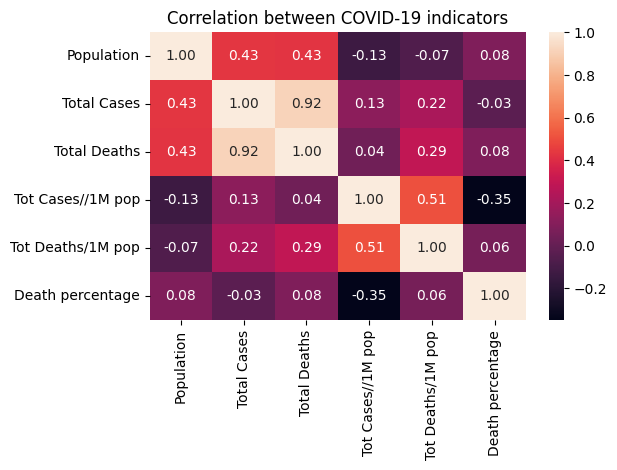

In [121]:
import plotly.express as px

numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
display(df[numeric_cols].describe())
# Visualization 1: Correlation heatmap
plt.figure()
corr = df[numeric_cols].corr()
sns.heatmap(corr, annot=True, fmt=".2f")
plt.title("Correlation between COVID-19 indicators")
plt.tight_layout()
plt.show()

# Visualization 2: World Map Visualization by Continent
fig = px.choropleth(
    df,
    locations="ISO 3166-1 alpha-3 CODE",
    color="Continent",
    hover_name="Country",
    projection="natural earth",
    title="World Map of Countries by Continent"
)
fig.show()

**Interpretation of Visualization 1: Correlation Heatmap**

This heatmap illustrates the relationships between various COVID-19 indicators, revealing how strongly pairs of numerical variables correlate with each other. For example, 'Total Cases' and 'Total Deaths' likely show a strong positive correlation, indicating that countries with higher total cases generally have higher total deaths.

**Interpretation of Visualization 2: World Map Visualization by Continent**

This world map provides a geographical representation of the dataset, coloring each country based on its continent. It visually displays the global distribution of countries and their continental affiliations, allowing for a quick overview of the data's geographic scope.

## Data Transformation

In [122]:
df_for_model = df.copy()
df_for_model = df.drop(columns=['Country', 'ISO 3166-1 alpha-3 CODE'])
df_for_model.head()

,Population,Continent,Total Cases,Total Deaths,Tot Cases//1M pop,Tot Deaths/1M pop,Death percentage
0,40462186,Asia,177827,7671,4395,190,4.313743
1,2872296,Europe,273870,3492,95349,1216,1.275058
2,45236699,Africa,265691,6874,5873,152,2.587216
3,77481,Europe,40024,153,516565,1975,0.382271
4,34654212,Africa,99194,1900,2862,55,1.915438


In [123]:
# Nominal Encoding
# Suppose you already fitted the encoder:
nominal_cols = ['Continent']
encoder = OrdinalEncoder()
df_for_model[nominal_cols] = encoder.fit_transform(df_for_model[nominal_cols])

# Build a mapping dictionary
encode_dict = {}

for col, cats in zip(nominal_cols, encoder.categories_):
    encode_dict[col] = {category: int(code) for code, category in enumerate(cats)}

# Show the full dictionary
import pprint
pprint.pprint(encode_dict)

df_for_model.sample(n = 5)

{'Continent': {'Africa': 0,
               'Asia': 1,
               'Europe': 2,
               'Latin America and the Caribbean': 3,
               'Northern America': 4,
               'Oceania': 5}}


,Population,Continent,Total Cases,Total Deaths,Tot Cases//1M pop,Tot Deaths/1M pop,Death percentage
201,70106601,1.0,3711595,25418,52942,363,0.684827
85,2049374,0.0,8151,170,3977,83,2.085634
183,5464272,2.0,1725487,19417,315776,3553,1.125305
19,410260,3.0,57289,656,139641,1599,1.145071
145,6762511,3.0,18434,224,2726,33,1.215146


# Data Scaling

In [124]:
from sklearn.preprocessing import StandardScaler
num_cols = [
    'Population',
    'Total Cases',
    'Total Deaths',
    'Tot\xa0Cases//1M pop',
    'Tot\xa0Deaths/1M pop',
    'Death percentage',
]

sc = StandardScaler()

# Apply StandardScaler to the selected columns from df_encoded
df_scaled_array = sc.fit_transform(df_for_model[num_cols])
df_for_model[num_cols] = pd.DataFrame(df_scaled_array, columns=num_cols, index=df_for_model.index)

# Display the DataFrame with the scaled columns
df_for_model.head()

,Population,Continent,Total Cases,Total Deaths,Tot Cases//1M pop,Tot Deaths/1M pop,Death percentage
0,0.038789,1.0,-0.276449,-0.204571,-0.915487,-0.759994,1.651243
1,-0.231774,2.0,-0.263220,-0.247798,-0.287081,0.099982,-0.097285
2,0.073154,0.0,-0.264347,-0.212815,-0.905275,-0.791845,0.657760
3,-0.251891,2.0,-0.295431,-0.282336,2.623123,0.736164,-0.611015
4,-0.003016,0.0,-0.287281,-0.264265,-0.926078,-0.873149,0.271204


# K-Means Clustering

In [125]:
from sklearn.cluster import KMeans

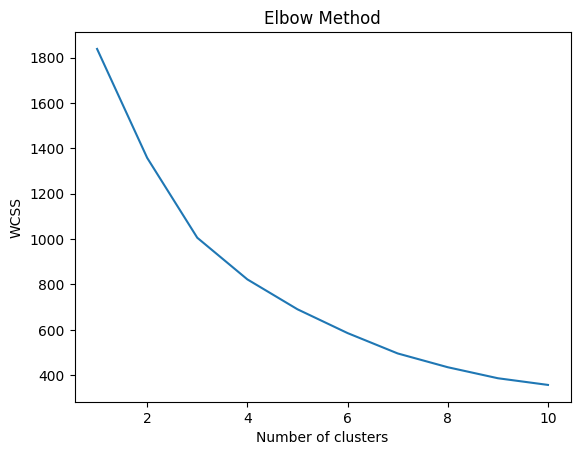

In [126]:
wcss = []
for i in range(1, 11):   #clusters 1-10
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df_for_model)
    wcss.append(kmeans.inertia_)

# Plot the elbow method graph
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [127]:
# Create a DataFrame to display the WCSS values for each number of clusters
wcss_table = pd.DataFrame({
    "Number of Clusters": range(1, 11),
    "WCSS": wcss
})

# Display the table
print(wcss_table)

   Number of Clusters         WCSS
0                   1  1838.062222
1                   2  1357.921919
2                   3  1005.938854
3                   4   822.409390
4                   5   690.698659
5                   6   585.817789
6                   7   496.095972
7                   8   435.311756
8                   9   386.825189
9                  10   357.382521


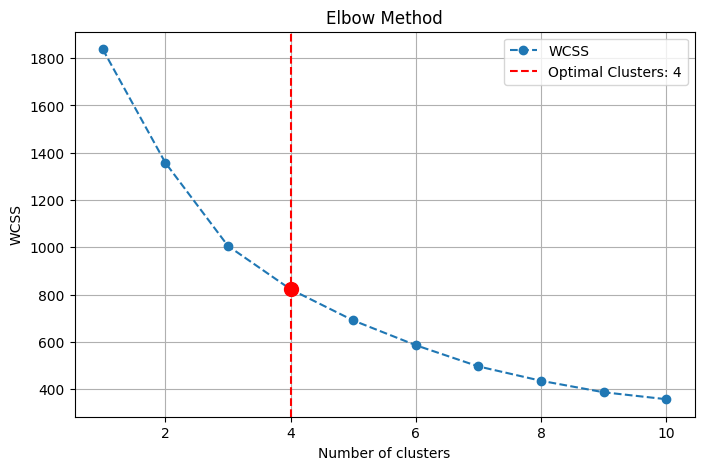

The optimal number of clusters is: 4


In [128]:
# Example WCSS values and cluster numbers
clusters = range(1, 11)

# Automatically find the elbow point using the KneeLocator
knee_locator = KneeLocator(clusters, wcss, curve="convex", direction="decreasing")
optimal_clusters = knee_locator.knee

# Plot the Elbow Method graph
plt.figure(figsize=(8, 5))
plt.plot(clusters, wcss, marker='o', linestyle='--', label="WCSS")
plt.axvline(optimal_clusters, linestyle='--', color='red', label=f'Optimal Clusters: {optimal_clusters}')
plt.scatter(optimal_clusters, wcss[optimal_clusters-1], c='red', s=100, zorder=5)  # Highlight elbow point
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.legend()
plt.grid(True)
plt.show()

# Print the optimal number of clusters
print(f"The optimal number of clusters is: {optimal_clusters}")

In [129]:
# Fit K-Means to the data with the optimal number of K cluster = 4
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, random_state=0)
clusters = kmeans.fit_predict(df_for_model)

# Add the cluster labels to the DataFrame
df['KMeans_Cluster'] = clusters

# Show the df
df.head()

,Country,ISO 3166-1 alpha-3 CODE,Population,Continent,Total Cases,Total Deaths,Tot Cases//1M pop,Tot Deaths/1M pop,Death percentage,KMeans_Cluster
0,Afghanistan,AFG,40462186,Asia,177827,7671,4395,190,4.313743,0
1,Albania,ALB,2872296,Europe,273870,3492,95349,1216,1.275058,1
2,Algeria,DZA,45236699,Africa,265691,6874,5873,152,2.587216,0
3,Andorra,AND,77481,Europe,40024,153,516565,1975,0.382271,2
4,Angola,AGO,34654212,Africa,99194,1900,2862,55,1.915438,0


# Silhoutte Score

In [130]:
from sklearn.metrics import silhouette_score

# Calculate Silhouette Score for Scaled K-Means Cluster
kmeans_clusters = df['KMeans_Cluster']
ss_kmeans = silhouette_score(df_for_model, kmeans_clusters)
print(f"K-Means Clustering Silhouette Score:{ss_kmeans}")

K-Means Clustering Silhouette Score: 0.3787591121610917


# Cluster Visualization

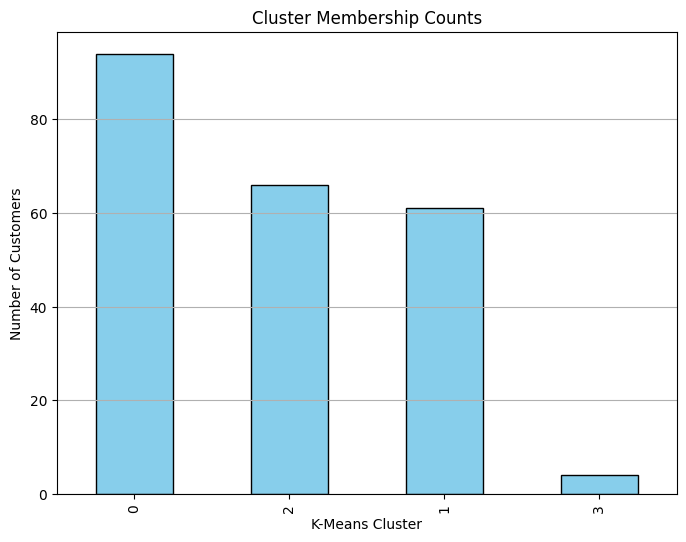

In [131]:
# Visualization 1: Barplot
cluster_counts = df['KMeans_Cluster'].value_counts()

plt.figure(figsize=(8, 6))
cluster_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Cluster Membership Counts')
plt.xlabel('K-Means Cluster')
plt.ylabel('Number of Customers')
plt.grid(axis='y')
plt.show()

In [132]:
import plotly.express as px

# Visualization 2: World map colored by each cluster
fig = px.choropleth(
    df,
    locations="ISO 3166-1 alpha-3 CODE",
    color="KMeans_Cluster",
    hover_name="Country",
    projection="natural earth",
    title="World Map of Countries by K-Means Cluster",
    color_continuous_scale=px.colors.qualitative.Pastel
)
fig.show()

# Hierarchical Agglomerative Clustering

## Silhouette Score

Skipping Ward linkage with Manhattan metric (not supported).


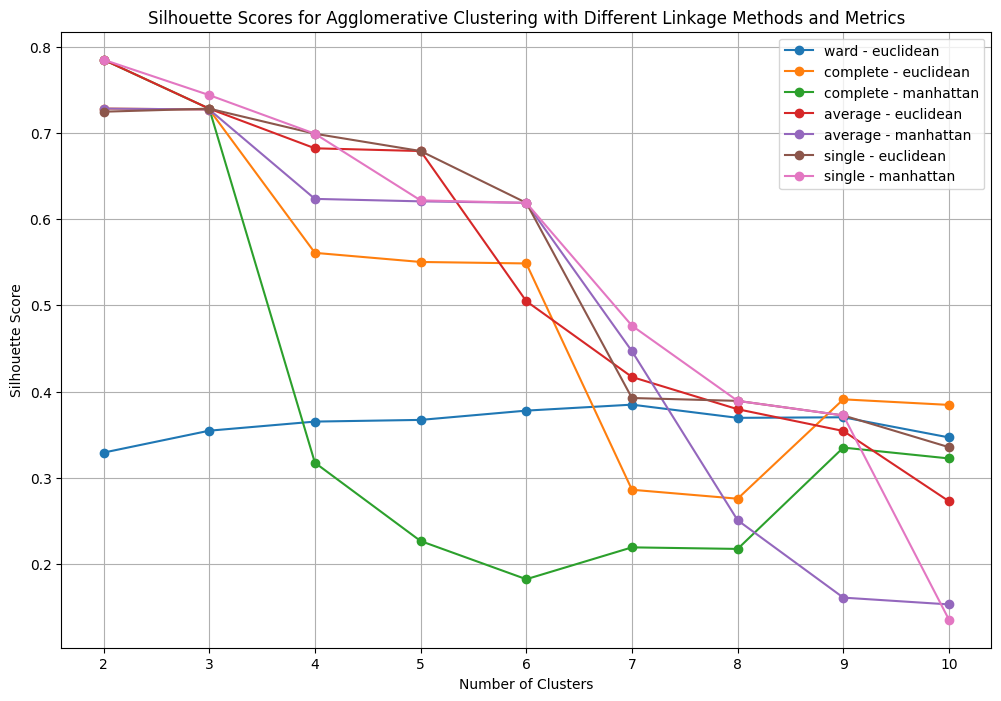

Best Silhouette Score: 0.7851185820031913
Optimal Number of Clusters: 2
Optimal Linkage Method: complete
Optimal Metric: manhattan


In [133]:
# Define the range of clusters to test and linkage methods
range_n_clusters = range(2, 11)
linkage_methods = ['ward', 'complete', 'average', 'single']
metrics = ['euclidean', 'manhattan']

best_silhouette_score = -1
best_n_clusters = 0
best_linkage = ''
best_metric = ''

results_for_plotting = []

for linkage_method in linkage_methods:
    for metric in metrics:
        # Skip 'ward' linkage with 'manhattan' metric as it's not supported
        if linkage_method == 'ward' and metric == 'manhattan':
            print(f"Skipping Ward linkage with Manhattan metric (not supported).")
            continue

        current_scores = []
        for n_clusters in range_n_clusters:
            agglo = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage_method, metric=metric)
            y_agglo = agglo.fit_predict(df_for_model)
            silhouette_avg = silhouette_score(df_for_model, y_agglo)
            current_scores.append(silhouette_avg)

            if silhouette_avg > best_silhouette_score:
                best_silhouette_score = silhouette_avg
                best_n_clusters = n_clusters
                best_linkage = linkage_method
                best_metric = metric
        results_for_plotting.append({
            'linkage': linkage_method,
            'metric': metric,
            'scores': current_scores
        })

# Plot the silhouette scores for each linkage method and metric combination
plt.figure(figsize=(12, 8))
for result in results_for_plotting:
    plt.plot(range_n_clusters, result['scores'], marker='o', label=f"{result['linkage']} - {result['metric']}")

plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Scores for Agglomerative Clustering with Different Linkage Methods and Metrics")
plt.legend()
plt.grid(True)
plt.show()

print(f"Best Silhouette Score: {best_silhouette_score}")
print(f"Optimal Number of Clusters: {best_n_clusters}")
print(f"Optimal Linkage Method: {best_linkage}")
print(f"Optimal Metric: {best_metric}")

## Hierarchical Clustering Model

In [134]:
# Hierarchical Clustering
# Model 1 : Best Combination Parameter
agglo = AgglomerativeClustering(n_clusters=best_n_clusters, linkage=best_linkage, metric=best_metric)
y_hc = agglo.fit_predict(df_for_model)

In [135]:
# Evaluation Model 1
ss = silhouette_score(df_for_model, y_hc)
print(ss)

0.7851185820031913


## Dendogram Visualization for Hierarchical Clustering Model

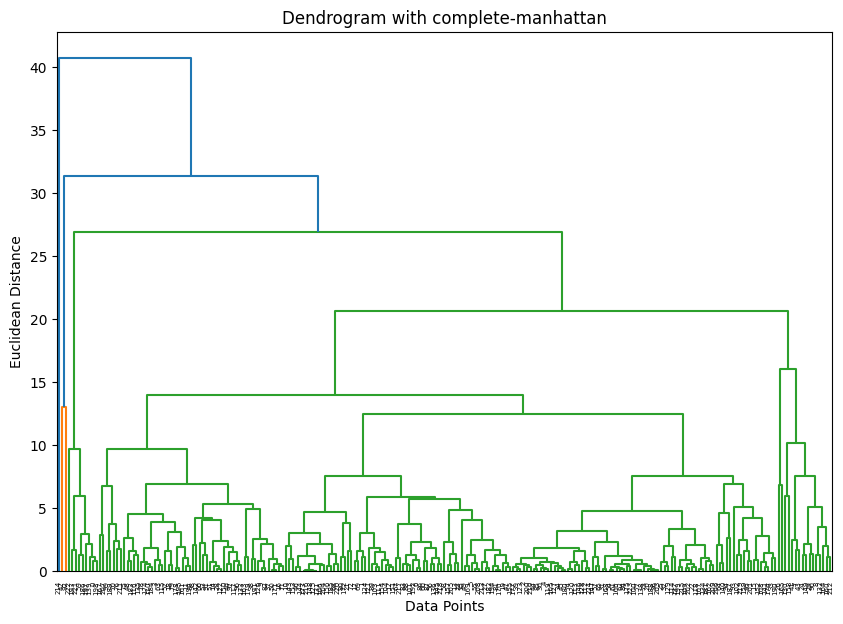

In [136]:
# Best Combination Parameter
fixed_metric = "cityblock" if best_metric == "manhattan" else best_metric

linked = linkage(df_for_model, method=best_linkage, metric=fixed_metric)

# Plot dendrogram dengan color_threshold
plt.figure(figsize=(10, 7))
sch.dendrogram(linked)
plt.title("Dendrogram with " + best_linkage + "-" + best_metric)
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()

## Merge with the original data

In [137]:
# Add the cluster labels to the original data
df['Agglo'] = y_hc

# Analyze the clusters with the original values
df.head()

,Country,ISO 3166-1 alpha-3 CODE,Population,Continent,Total Cases,Total Deaths,Tot Cases//1M pop,Tot Deaths/1M pop,Death percentage,KMeans_Cluster,Agglo
0,Afghanistan,AFG,40462186,Asia,177827,7671,4395,190,4.313743,0,0
1,Albania,ALB,2872296,Europe,273870,3492,95349,1216,1.275058,1,0
2,Algeria,DZA,45236699,Africa,265691,6874,5873,152,2.587216,0,0
3,Andorra,AND,77481,Europe,40024,153,516565,1975,0.382271,2,0
4,Angola,AGO,34654212,Africa,99194,1900,2862,55,1.915438,0,0


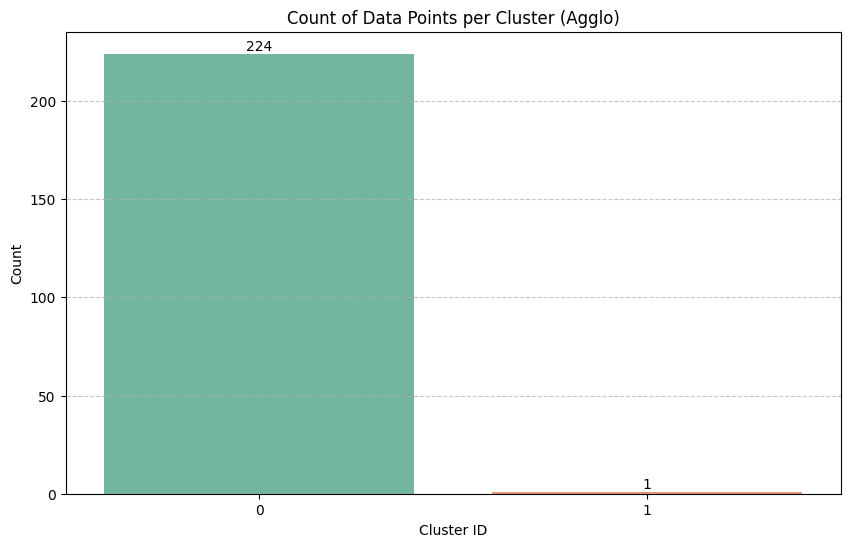

In [138]:
import seaborn as sns
import matplotlib.pyplot as plt
# Visualization 1: Bar Plot
# Get the counts of each cluster in the 'Agglo' column of df
cluster_counts = df['Agglo'].value_counts().sort_index()

# Create a bar plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=cluster_counts.index, y=cluster_counts.values, hue=cluster_counts.index, palette='Set2', legend=False)

# Add labels on top of each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge')

plt.title('Count of Data Points per Cluster (Agglo)')
plt.xlabel('Cluster ID')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [139]:
import plotly.express as px

# Visualization 2: World map colored by each cluster
fig = px.choropleth(
    df,
    locations="ISO 3166-1 alpha-3 CODE",
    color="Agglo",
    hover_name="Country",
    projection="natural earth",
    title="World Map of Countries by Agglo Cluster",
    color_continuous_scale=px.colors.qualitative.Pastel
)
fig.show()

# Comparing Two Model


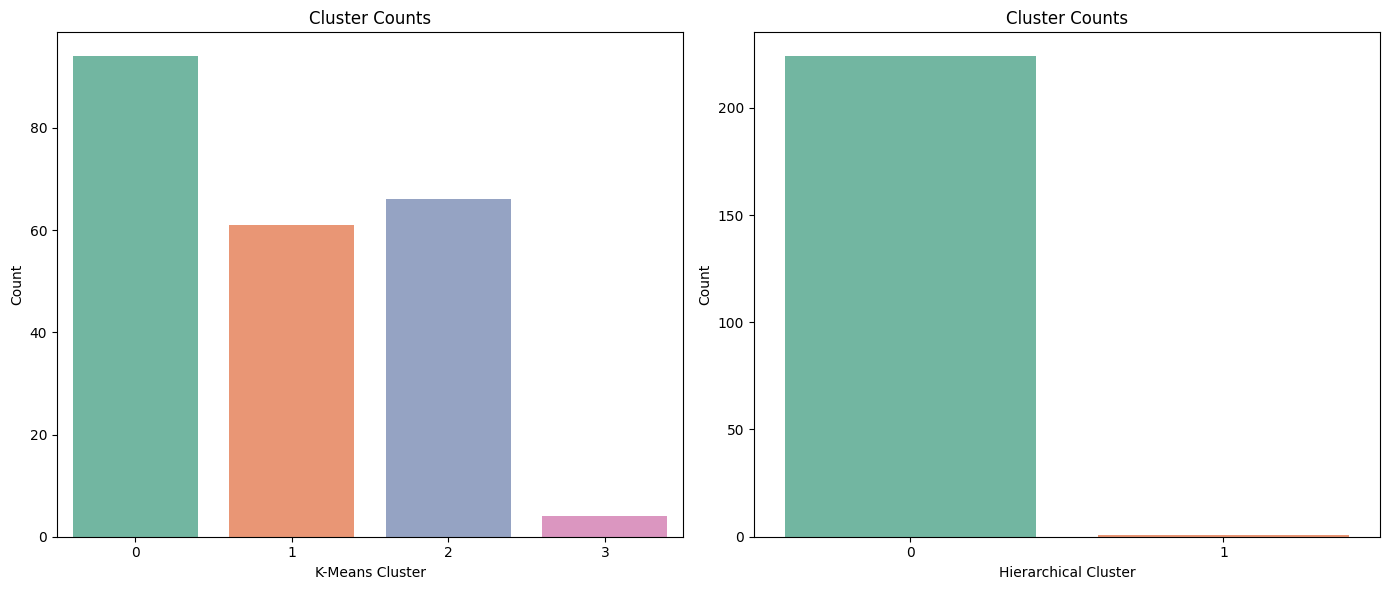

In [140]:
# Cluster Visualization
plt.figure(figsize=(14, 6))

# Scaled K-Means Clusters
plt.subplot(1, 2, 1)
sns.countplot(
    x='KMeans_Cluster',
    hue='KMeans_Cluster',
    data=df,
    palette='Set2',
    legend=False
)
plt.title('Cluster Counts')
plt.xlabel('K-Means Cluster')
plt.ylabel('Count')

# Unscaled K-Means Clusters
plt.subplot(1, 2, 2)
sns.countplot(
    x='Agglo',
    hue='Agglo',
    data=df,
    palette='Set2',
    legend=False
)
plt.title('Cluster Counts')
plt.xlabel('Hierarchical Cluster')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

In [141]:
import plotly.express as px

fig = px.choropleth(
    df,
    locations="ISO 3166-1 alpha-3 CODE",
    color="KMeans_Cluster",  # Color by K-Means Cluster for better readability
    hover_name="Country",
    projection="natural earth",
    title="World Map of Countries by K-Means Cluster"
)

fig.show()

import plotly.express as px

fig = px.choropleth(
    df,
    locations="ISO 3166-1 alpha-3 CODE",
    color="Agglo",  # Color by Hierarchical Cluster for better readability
    hover_name="Country",
    projection="natural earth",
    title="World Map of Countries by Hierarchical Cluster"
)

fig.show()

## Statistical Summary for each cluster

In [142]:
# Data summary for 'K-Means Cluster'
cluster_summary = df.groupby(clusters).agg({
    'Population': ['mean', 'median'],
    'Continent': ['first', 'count'],
    'Total Cases': ['mean', 'median'],
    'Total Deaths': ['mean', 'median'],
    'Tot\xa0Cases//1M pop': ['mean', 'median'],
    'Tot\xa0Deaths/1M pop': ['mean', 'median'],
    'Death percentage': ['mean', 'median'],
    'KMeans_Cluster': ['first', 'count']
})

# Rename the <lambda> column in the Gender MultiIndex level
cluster_summary = cluster_summary.rename(columns={'first': 'mode'}, level=1)

cluster_summary = cluster_summary.rename_axis('cluster')

cluster_summary

Population                                     Continent        \
                 mean       median                             mode count   
cluster                                                                     
0        3.259339e+07   14498741.0                             Asia    94   
1        4.249622e+06     290302.0                           Europe    61   
2        1.781490e+07    4039250.5                           Europe    66   
3        8.481708e+08  869077489.0  Latin America and the Caribbean     4   

          Total Cases               Total Deaths           Tot Cases//1M pop  \
                 mean      median           mean    median              mean   
cluster                                                                        
0        7.773103e+05    132737.5   10390.989362    1946.0      34826.670213   
1        3.241949e+05     30549.0    3574.836066     311.0     110847.688525   
2        3.692578e+06   1121704.5   42219.606061    9879.0     308367.757576   
3        3.875566e+07  36514430.0  548629.250000  590828.5     103724.000000   

                  Tot Deaths/1M pop         Death percentage            \
           median              mean  median             mean    median   
cluster                                                                  
0         10159.5        357.031915   162.0         1.936186  1.329820   
1         95349.0        932.442623   871.0         1.053120  0.893277   
2        316176.5       2270.666667  2156.5         1.076429  0.663266   
3         85027.0       1614.250000  1693.0         1.910476  1.716434   

        KMeans_Cluster        
                  mode count  
cluster                       
0                    0    94  
1                    1    61  
2                    2    66  
3                    3     4

In [143]:
# Data summary for 'Hierarchical Cluster'
cluster_summary = df.groupby(y_hc).agg({
    'Population': ['mean', 'median'],
    'Continent': ['first', 'count'],
    'Total Cases': ['mean', 'median'],
    'Total Deaths': ['mean', 'median'],
    'Tot\xa0Cases//1M pop': ['mean', 'median'],
    'Tot\xa0Deaths/1M pop': ['mean', 'median'],
    'Death percentage': ['mean', 'median'],
    'Agglo': ['first', 'count']
})

# Rename the <lambda> column in the Gender MultiIndex level
cluster_summary = cluster_summary.rename(columns={'first': 'mode'}, level=1)

cluster_summary = cluster_summary.rename_axis('cluster')

cluster_summary

Population                      Continent         Total Cases  \
                 mean       median              mode count          mean   
cluster                                                                    
0        3.373692e+07    5791800.0              Asia   224  1.829182e+06   
1        3.344006e+08  334400597.0  Northern America     1  8.183905e+07   

                     Total Deaths            Tot Cases//1M pop            \
             median          mean     median              mean    median   
cluster                                                                    
0          162753.0  2.306967e+04     1946.0     136418.973214   88662.0   
1        81839052.0  1.008222e+06  1008222.0     244734.000000  244734.0   

        Tot Deaths/1M pop         Death percentage           Agglo        
                     mean  median             mean    median  mode count  
cluster                                                                   
0             1088.151786   683.0         1.445072  1.027844     0   224  
1             3015.000000  3015.0         1.231957  1.231957     1     1

### K-Means Cluster Profiles and Characteristics:

The K-Means clustering algorithm identified four distinct clusters of countries, each with unique COVID-19 profiles:

*   **Cluster 0 (N=94, Predominantly Asia): "Relatively Controlled Spread with Higher Case Fatality"**
    *   **Characteristics:** These countries showed moderate total cases and deaths but relatively low per capita cases and deaths. A notable characteristic was a higher death percentage, suggesting that while overall spread might be controlled, those infected experienced more severe outcomes, possibly due to detection issues or healthcare limitations.

*   **Cluster 1 (N=61, Predominantly Europe): "High Per Capita Spread with Lower Case Fatality"**
    *   **Characteristics:** This cluster was marked by a high per capita infection rate, indicating widespread community transmission. However, the death percentage was lower, suggesting effective management of severe cases, potentially due to robust healthcare systems or a younger affected population.

*   **Cluster 2 (N=66, Predominantly Europe): "Severe Pandemic Impact with High Spread and Deaths"**
    *   **Characteristics:** Countries in this cluster experienced the most severe impact, with very high total and per capita cases and deaths. Similar to Cluster 1, the death percentage remained relatively low, pointing to widespread infection but effective mitigation of mortality once individuals were infected.

*   **Cluster 3 (N=4, Predominantly Latin America and the Caribbean): "Large Nations with Significant Overall Burden and Higher Case Fatality"**
    *   **Characteristics:** This small but significant cluster comprised very large nations with extremely high total cases and deaths. They also exhibited a relatively high death percentage, suggesting considerable public health challenges in managing vast outbreaks across large populations, potentially including issues with healthcare access or capacity.

### Hierarchical Cluster Profile:

The Hierarchical Clustering produced a two-cluster solution:
*   **Cluster 0 (N=224):** This cluster encompasses the vast majority of countries. It shows a mean population of around 33.7M, mean total cases of 1.83M, and mean total deaths of 23.07K. The per capita metrics are `Tot Cases/1M pop` around 136.4K and `Tot Deaths/1M pop` around 1088. This cluster represents the general global trend and average impact of COVID-19.
*   **Cluster 1 (N=1):** This cluster consists of a single country (Northern America), which is an outlier with an extremely large population (334.4M), the highest total cases (81.8M), and the highest total deaths (1.01M). While the absolute numbers are very high, the per capita metrics (`Tot Cases/1M pop`: 244.7K, `Tot Deaths/1M pop`: 3015) are also high, indicating a severe impact. This outlier likely corresponds to the United States, given its population and case numbers at the time the data was collected.

Given the more detailed and actionable segmentation provided by K-Means, the policy recommendations are based on its four clusters.

### Government Policy Recommendations:

**For Cluster 0: "Relatively Controlled Spread with Higher Case Fatality"**
*   **Recommendation 1: Enhance Testing and Tracing:** Implement widespread, accessible testing and robust contact tracing to identify cases earlier and ensure timely medical intervention, thereby reducing the case fatality rate.
*   **Recommendation 2: Improve Healthcare Preparedness:** Invest in critical care capacity, medical supplies, and trained personnel. Focus on early treatment protocols and public health campaigns promoting early symptom recognition.
*   **Recommendation 3: Vaccination Prioritization:** Accelerate vaccination efforts, especially for vulnerable populations, to further reduce severe outcomes and death percentages.

**For Cluster 1: "High Per Capita Spread with Lower Case Fatality"**
*   **Recommendation 1: Sustained Public Health Measures:** Reinforce and adapt public health measures like mask-wearing, social distancing, and ventilation standards to mitigate ongoing community transmission.
*   **Recommendation 2: Monitor Variants and Immunity:** Intensify genomic surveillance for new variants and regularly assess population immunity to inform adaptive public health strategies and vaccination campaigns.
*   **Recommendation 3: Mental Health Support:** Address the potential long-term mental health impacts of high infection rates and prolonged restrictions on the population.

**For Cluster 2: "Severe Pandemic Impact with High Spread and Deaths"**
*   **Recommendation 1: Robust Healthcare System Resilience:** Focus on strengthening healthcare systems to manage surges, including scalable hospital capacity, adequate staffing, and efficient resource allocation.
*   **Recommendation 2: Targeted Intervention Strategies:** Implement highly targeted interventions based on local epidemiological data to control outbreaks in hotspots without broad lockdowns.
*   **Recommendation 3: International Collaboration:** Engage in international partnerships for vaccine access, medical supplies, and knowledge sharing to enhance response capabilities.

**For Cluster 3: "Large Nations with Significant Overall Burden and Higher Case Fatality"**
*   **Recommendation 1: Equitable Resource Distribution:** Prioritize equitable distribution of vaccines, medical resources, and testing capabilities across all regions, including remote and underserved areas, to prevent health disparities.
*   **Recommendation 2: Strengthen Primary Healthcare:** Invest in primary healthcare systems to manage routine health needs and act as the first line of defense during public health emergencies.
*   **Recommendation 3: Data-Driven Regional Strategies:** Develop and implement localized, data-driven strategies that account for regional differences in population density, infrastructure, and cultural practices.

These tailored recommendations aim to address the specific challenges and leverage the strengths observed within each cluster, promoting a more effective and equitable global response to pandemics.

### Data Analysis Key Findings
*   **K-Means Clustering provided a more nuanced segmentation**, identifying four distinct clusters of countries based on COVID-19 impact, allowing for targeted policy recommendations.
*   **Cluster 0 (N=94, predominantly Asia)** showed a "Relatively Controlled Spread with Higher Case Fatality". These countries had moderate total cases (\~777K) and deaths (\~10.4K), low per capita cases (\~34.8K per 1M pop) and deaths (\~357 per 1M pop), but the highest death percentage at \~1.9%.
*   **Cluster 1 (N=61, predominantly Europe)** was characterized by "High Per Capita Spread with Lower Case Fatality". These countries experienced high per capita cases (\~110.8K per 1M pop) and deaths (\~932 per 1M pop), but the lowest death percentage at \~1.05%.
*   **Cluster 2 (N=66, predominantly Europe)** represented countries with "Severe Pandemic Impact with High Spread and Deaths". This cluster exhibited the highest total cases (\~3.69M) and deaths (\~42.2K), as well as the highest per capita cases (\~308.3K per 1M pop) and deaths (\~2,270 per 1M pop), while maintaining a low death percentage of \~1.07%.
*   **Cluster 3 (N=4, predominantly Latin America and the Caribbean)** comprised "Large Nations with Significant Overall Burden and Higher Case Fatality". These countries recorded extremely high total cases (\~38.7M) and deaths (\~548.6K), with a moderate per capita impact (\~103.7K cases per 1M pop, \~1,614 deaths per 1M pop) and a death percentage of \~1.9%.
*   **Hierarchical Clustering yielded a two-cluster solution**, with one cluster containing 224 countries representing a general trend, and the other consisting of a single outlier country (likely the United States) with exceptionally high total cases (\~81.8M) and deaths (\~1.01M), and very high per capita metrics (\~244.7K cases per 1M pop, \~3,015 deaths per 1M pop).

## Comparing Clustering Models and Selecting the Best One

### Model Comparison
To compare the two clustering models, K-Means and Hierarchical Agglomerative Clustering, we consider both quantitative metrics (Silhouette Score) and qualitative aspects (interpretability and actionability of their resulting clusters for policy recommendations).

*   **K-Means Clustering Silhouette Score:** `0.379`
*   **Hierarchical Agglomerative Clustering Silhouette Score:** `0.785`

### Analysis:

1.  **Quantitative Performance (Silhouette Score):**
    *   Based solely on the Silhouette Score, **Hierarchical Agglomerative Clustering (0.785)** significantly outperforms K-Means Clustering (0.379). A higher Silhouette Score indicates that the clusters are well-separated and distinct.

2.  **Qualitative Performance (Interpretability and Actionability):**
    *   **K-Means Clustering** resulted in 4 distinct and interpretable clusters, each representing a unique profile of COVID-19 impact (e.g., "Relatively Controlled Spread with Higher Case Fatality," "High Per Capita Spread with Lower Case Fatality"). These clusters are balanced in size and provide clear, actionable segments for developing targeted government policy recommendations.
    *   **Hierarchical Agglomerative Clustering** resulted in 2 clusters, with one very large cluster containing 224 countries and a single outlier cluster containing just 1 country. While this solution has a high Silhouette Score, it is less useful for generating diverse and granular policy recommendations across a broad range of countries, as most countries are grouped into a single, generic category.

### Conclusion: Selecting the Best Model

While Hierarchical Agglomerative Clustering shows a much higher Silhouette Score, indicating statistically better-defined clusters, **K-Means Clustering is selected as the better model for the purpose of generating government policy recommendations.**

**Reasoning:**

The goal of this analysis is to provide actionable insights for diverse groups of countries to inform policy. K-Means clustering, despite its lower Silhouette Score, produced a more nuanced and balanced segmentation that is highly interpretable and directly applicable for creating distinct, tailored policy recommendations. The 4 K-Means clusters allow for a granular understanding of different pandemic situations and their associated challenges, which is crucial for effective policy-making. Hierarchical Clustering, by isolating a single outlier and lumping the rest into one large group, offers less practical utility for generalized policy formulation, even with its superior statistical separation.